# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [6]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 32.81 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/perceptron_algorithm


In [7]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [8]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

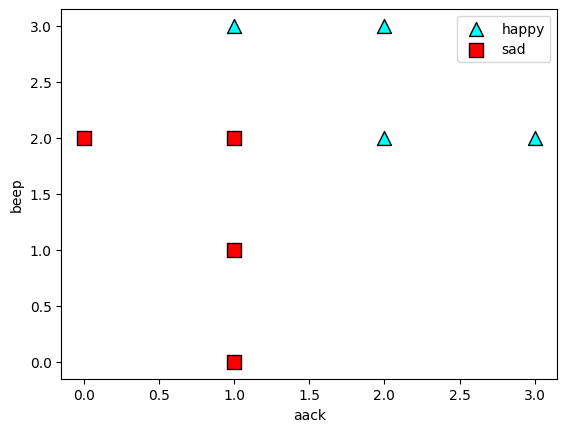

In [9]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
#utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [42]:
def step(x):
    ## TODO ##
    # implement step function

    return 1 if x >= 0 else 0

def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output = np.dot(features, weights) + bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions

    return step(score(weights, bias, features))

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions

    return label - prediction(weights, bias, features)

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [43]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample

    prediction_error = error(weights, bias, features, label)
    weights = weights + prediction_error * features * learning_rate
    bias = bias + prediction_error * learning_rate
    print("weight: ", weights)
    print("bias: ", bias)
    return weights, bias

### Running the perceptron algorithm

In [51]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    # append mean mean_perceptron_error in the errors list after each epoch

    for i in range(epochs):
        idx = random.randint(0, len(features) - 1)
        print(idx)
        print(features[idx])
        print(labels[idx])
        weights, bias = perceptron_trick(weights, bias, features[idx], labels[idx], learning_rate)
        errors.append(mean_perceptron_error(weights, bias, features, labels))

    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    plt.show()
    return weights, bias

6
[2 3]
1
weight:  [1. 1.]
bias:  0.0
6
[2 3]
1
weight:  [1. 1.]
bias:  0.0
0
[1 0]
0
weight:  [0.99 1.  ]
bias:  -0.01
4
[1 3]
1
weight:  [0.99 1.  ]
bias:  -0.01
7
[3 2]
1
weight:  [0.99 1.  ]
bias:  -0.01
6
[2 3]
1
weight:  [0.99 1.  ]
bias:  -0.01
4
[1 3]
1
weight:  [0.99 1.  ]
bias:  -0.01
7
[3 2]
1
weight:  [0.99 1.  ]
bias:  -0.01
5
[2 2]
1
weight:  [0.99 1.  ]
bias:  -0.01
3
[1 2]
0
weight:  [0.98 0.98]
bias:  -0.02
2
[1 1]
0
weight:  [0.97 0.97]
bias:  -0.03
4
[1 3]
1
weight:  [0.97 0.97]
bias:  -0.03
2
[1 1]
0
weight:  [0.96 0.96]
bias:  -0.04
1
[0 2]
0
weight:  [0.96 0.94]
bias:  -0.05
4
[1 3]
1
weight:  [0.96 0.94]
bias:  -0.05
2
[1 1]
0
weight:  [0.95 0.93]
bias:  -0.060000000000000005
4
[1 3]
1
weight:  [0.95 0.93]
bias:  -0.060000000000000005
1
[0 2]
0
weight:  [0.95 0.91]
bias:  -0.07
1
[0 2]
0
weight:  [0.95 0.89]
bias:  -0.08
5
[2 2]
1
weight:  [0.95 0.89]
bias:  -0.08
7
[3 2]
1
weight:  [0.95 0.89]
bias:  -0.08
1
[0 2]
0
weight:  [0.95 0.87]
bias:  -0.09
5
[2 2]
1
we

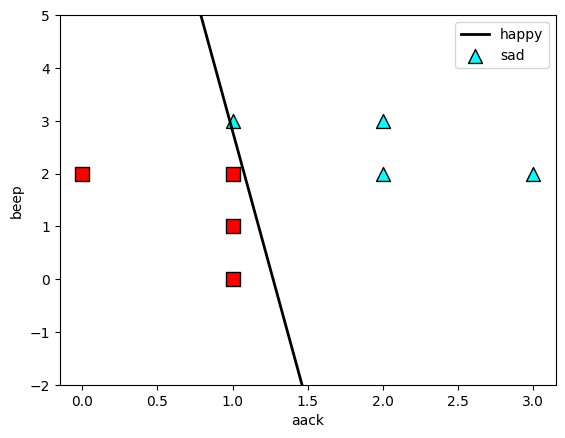

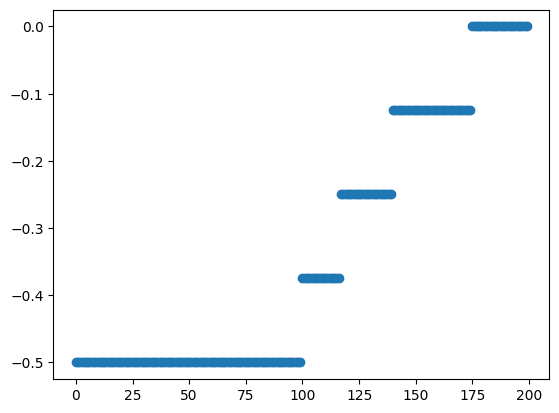

(array([0.52, 0.05]), np.float64(-0.6600000000000004))

In [50]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [ ]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# choose loss to be "perceptron" and tol = None
clf= SGDClassifier(loss="perceptron", tol=None)

In [ ]:
clf.score(features, labels)

In [ ]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()